<a href="https://colab.research.google.com/github/01DaisyLynn/KNN-NAIVEBAYES/blob/main/KNN___IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-nearest neighbor classification**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Perform K-Nearest Neighbours Classification to determine which passengers survived or didn't survive the accident

### b) Defining the Metric for Success

Model will be considered a success if it achieves more than 90%accuracy, the higher the accuracy the better

The very least(lowest acceptable accuracy) accuracy should be 80%

### c) Understanding the context 

The dataset contains records of people who did and didn't survive the titanic incident 

It contains information on the passagers i.e their names, class they ferried in, sex, age, ticket details, fare paid ...

### d) Recording the Experimental Design

1.  Reading data 
2.  Checking data for errors
3.  Tidying dataset
4.  Performing Exploratory Data Analysis
5.  Perfoming predictions



### e) Data Description

survival:	Survival	0 = No, 1 = Yes

pclass:Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: Column defines family relations(sibling and spouse)

parch: Column defines family relations(Parent and Child)

Embarked:	Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

## 2. Reading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/train_set.csv")



## 3. Checking the Data

In [ ]:
# Determining the shape of dataset
dataset.shape

#there are 891 rows and 12 columns

(891, 12)

In [ ]:
# Previewing the top of our dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking datatype
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#checking for unique values
dataset['Survived'].unique()

array([0, 1])

if passanger survived or not,  0 represents No and 1 represents yes 

In [ ]:
#checking for unique values
dataset['Pclass'].unique()

#there are only 3 classes

array([3, 1, 2])

In [ ]:
#checking for unique values
dataset['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

## 4. Tidying the Dataset

In [ ]:
#Dropping irrelevant column
dataset.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
dataset.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [ ]:
#Dropping irrelevant column
dataset.drop(['Name'], axis=1, inplace=True)
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [ ]:
#checking for duplicates
dataset.duplicated().sum()

107

No presence of duplicates

In [ ]:
# Identifying the Missing Data
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#checking percentage of missing values
missing= 100 * dataset.isnull().sum() / len(dataset)
print(missing)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [ ]:
#dropping the Cabin 
dataset.drop(['Cabin'], axis=1, inplace=True)
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


Column was dropped due to a high percentage of missing data of more than 75%

In [ ]:
#replacing the null values in embarked column with forward filing

dataset['Embarked'].fillna(method='ffill', inplace=True)
dataset['Age'].fillna(method='ffill', inplace=True)

used forward filing since it will not disrupt the data

In [ ]:
#Checking if missing values have been replaced
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

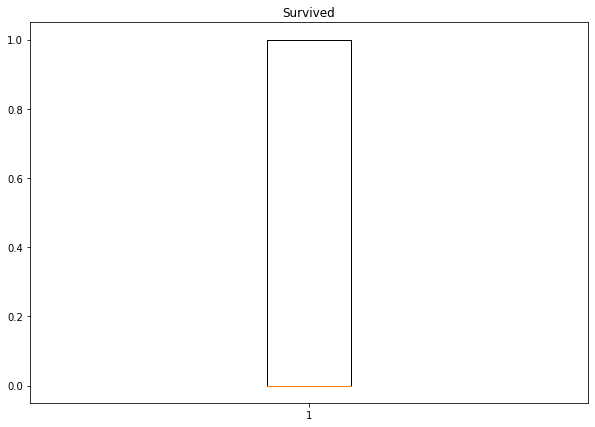

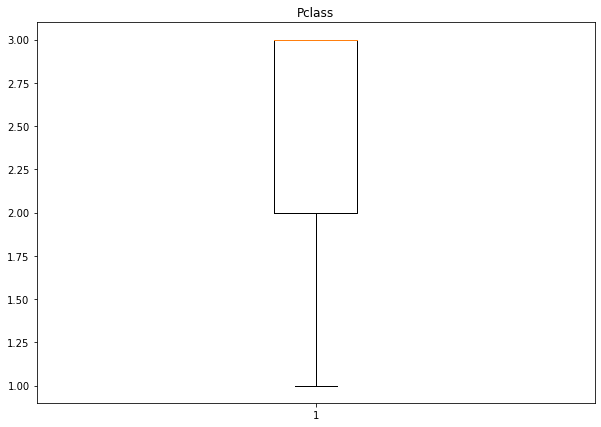

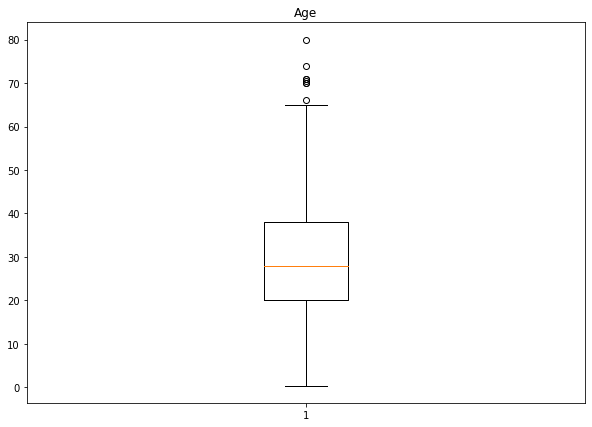

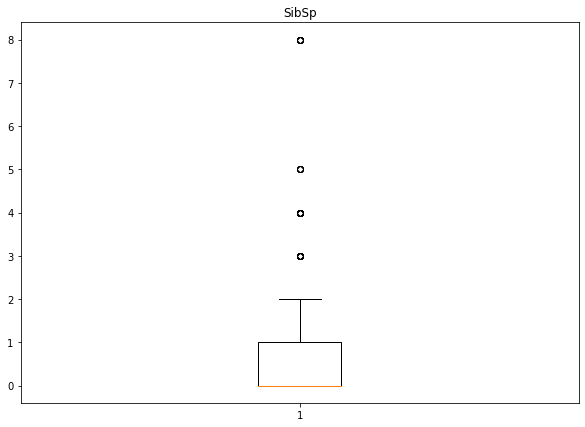

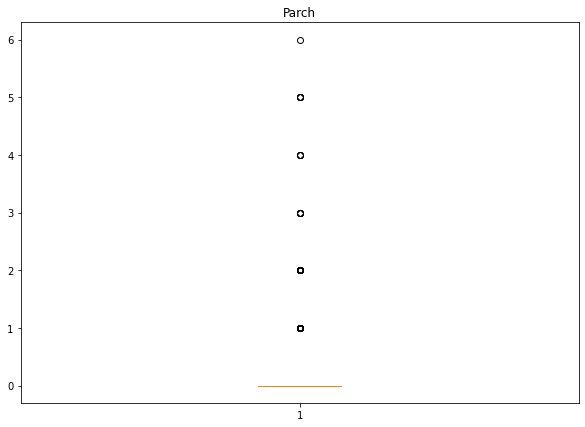

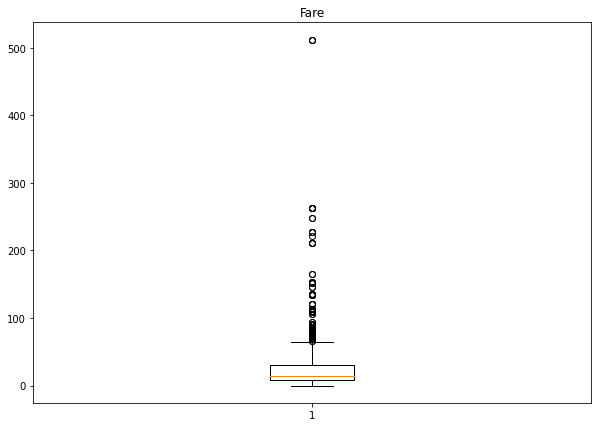

In [ ]:
# Checking for Outliers
col=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(dataset[i])
  plt.title(i)
  plt.show()

In [ ]:
#Removing outliers

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
 
df = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df.shape)                                   #Our new dataset has 600 rows and 8 columns

(600, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


We will remove outliers since KNN is adversely affected by the presence of outliers

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Our Clean dataset has 600 rows and 8 columns, no missing value nor duplicates

## 5. Exploratory Analysis

### ***Univariate Analysis***

In [ ]:
#frequency table for age variable
dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

most of the passangers boarded the third class

In [ ]:
#frequency table for age variable
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

most of the passangers were male

In [ ]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
# Finding the measures of central tendencies in the numerical columns

numerical_columns =['Survived','Pclass','Age','SibSp','Parch','Fare']

for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(dataset[column].mean()))
  print(column + ', Mode: '+ str(dataset[column].mode()))
  print(column + ', Median: '+ str(dataset[column].median()))
  print(column + ', Standard deviation: '+ str(dataset[column].std()))
  print(column + ', Variance: '+ str(dataset[column].var()))
  print(column + ', Skewness: '+ str(dataset[column].skew()))
  print(column + ', Kurtosis: '+ str(dataset[column].kurt()))



Survived, Mean: 0.3838383838383838
Survived, Mode: 0    0
dtype: int64
Survived, Median: 0.0
Survived, Standard deviation: 0.4865924542648585
Survived, Variance: 0.2367722165474984
Survived, Skewness: 0.4785234382949897
Survived, Kurtosis: -1.775004671066304


Pclass, Mean: 2.308641975308642
Pclass, Mode: 0    3
dtype: int64
Pclass, Median: 3.0
Pclass, Standard deviation: 0.8360712409770513
Pclass, Variance: 0.6990151199889065
Pclass, Skewness: -0.6305479068752845
Pclass, Kurtosis: -1.2800149715782825


Age, Mean: 29.581560044893376
Age, Mode: 0    24.0
dtype: float64
Age, Median: 28.0
Age, Standard deviation: 14.554589813600963
Age, Variance: 211.8360846421769
Age, Skewness: 0.32738170696022845
Age, Kurtosis: 0.08070710231053768


SibSp, Mean: 0.5230078563411896
SibSp, Mode: 0    0
dtype: int64
SibSp, Median: 0.0
SibSp, Standard deviation: 1.1027434322934275
SibSp, Variance: 1.2160430774662894
SibSp, Skewness: 3.6953517271630565
SibSp, Kurtosis: 17.880419726645968


Parch, Mean: 0.3

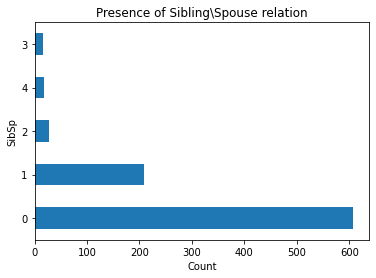

In [ ]:
#Bargraph showcasing 
dataset['SibSp'].value_counts().head().plot(kind= 'barh');

plt.xlabel("Count")
plt.ylabel("SibSp")

# Giving a title to our Bar chart
plt.title("Presence of Sibling\Spouse relation");

Most of the passangers had no record of having siblings or spouse relation

<Figure size 576x576 with 0 Axes>

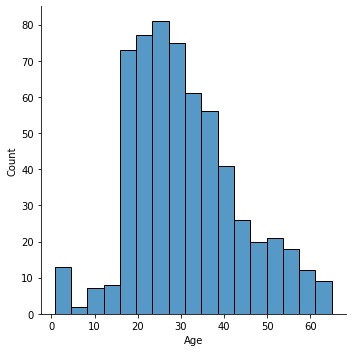

In [ ]:
#visualization of age using displot
plt.figure(figsize=(8, 8))
sns.displot(data=df, x='Age');
plt.show();

Most of the passangers are between the age of 20 to 30

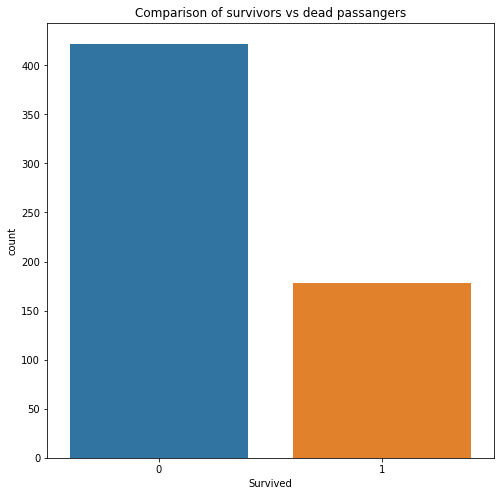

In [ ]:
#visualizing our survivors using countplot
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Survived')
plt.title('Comparison of survivors vs dead passangers')
plt.show()

Most the passangers didn't survive 

### ***Bivariate analysis***

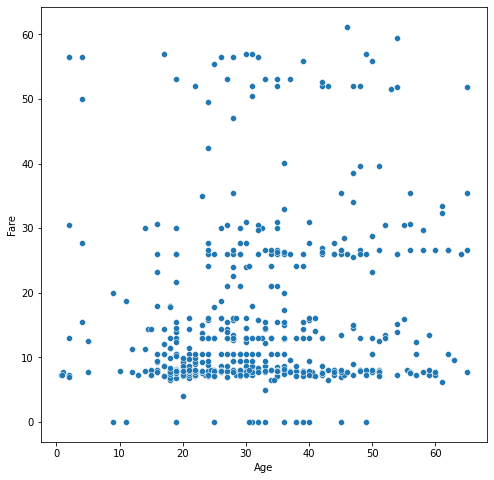

In [ ]:
# Relationship between age of the passenger and the amount of fare paid
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='Age', y='Fare');

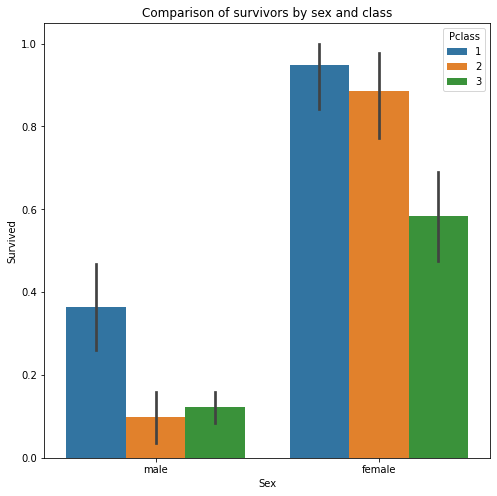

In [ ]:
#comparing the gender with most survivors and their passanger class

plt.figure(figsize=(8, 8))
sns.barplot(data=df, x='Sex', y='Survived', hue='Pclass')
plt.title('Comparison of survivors by sex and class')
plt.show()

Most of the male passanger borded the first class and most of the females also boarded the first class

In [ ]:
#convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

df['Sex'] = en.fit_transform(df['Sex'])
df['Embarked'] = en.fit_transform(df['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,35.0,0,0,8.4583,1


Sex = 1 is Male, 0 is female



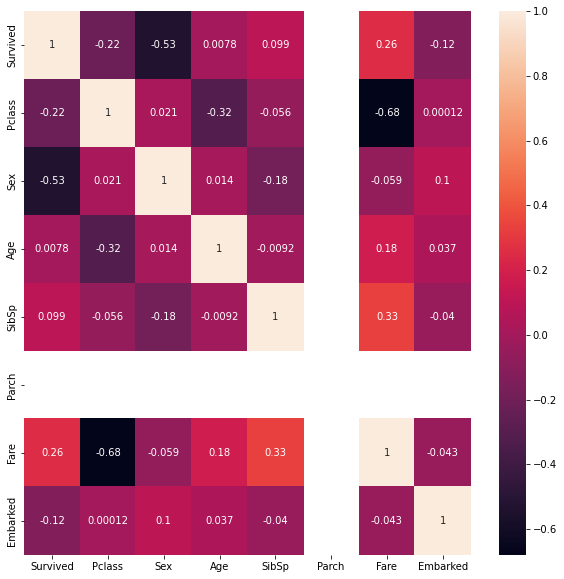

In [ ]:
#correlation using a heatmap
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

The relationship between fare and SibSp variable which is 0.33 shows that it is a postive correlation ie if one increases the other also increases.

The relationship between fare and Pclass is -0.68 shows a negative correlation ie if one increases the other decreases.

In [ ]:
correlations = df.corr()

correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.216002,-0.529288,0.007818,0.099055,NaN,0.255379,-0.123045
Pclass,-0.216002,1.000000,0.021010,-0.315282,-0.055773,NaN,-0.679165,0.000123
Sex,-0.529288,0.021010,1.000000,0.013675,-0.184367,NaN,-0.058769,0.103581
Age,0.007818,-0.315282,0.013675,1.000000,-0.009214,NaN,0.179307,0.037369
SibSp,0.099055,-0.055773,-0.184367,-0.009214,1.000000,NaN,0.330867,-0.040016
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.255379,-0.679165,-0.058769,0.179307,0.330867,NaN,1.000000,-0.042699
Embarked,-0.123045,0.000123,0.103581,0.037369,-0.040016,NaN,-0.042699,1.000000


Our variables have a low correlation thus no need to drop any

Research was done as to why the Parch Variable showcases NaN and results state that it is because the variable has no correlation with other variables 

## 6. Modeling

### Using 80 - 20 split

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Splitting independent and independent variables

X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

y = df['Survived'].values

In [ ]:
#splitting to train and test 80-20

X_train,X_test, Y_train,Y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
#normalizing data using feature scaling (model optimization)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#finding the best k_value using GrindSearchCV
paramas = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,20]}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, paramas, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 12}

K = 12 we will be using this for our prediction

In [ ]:
#Training dataset
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
#Making predictions
y_pred = classifier.predict(X_test)

In [ ]:
#getting Accuracy, Confusion matrix and classification report
print('Accuracy of our 80-20 model is : ', accuracy_score(Y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(Y_test, y_pred))

print('\n*************************************************')

print('\nClassification Report : ', classification_report(Y_test, y_pred))

Accuracy of our 80-20 model is :  0.8416666666666667

*************************************************

Confusion matrix :  [[75  5]
 [14 26]]

*************************************************

Classification Report :                precision    recall  f1-score   support

           0       0.84      0.94      0.89        80
           1       0.84      0.65      0.73        40

    accuracy                           0.84       120
   macro avg       0.84      0.79      0.81       120
weighted avg       0.84      0.84      0.84       120



The accuracy for the first model using 80% as the training set and 20% as a test set is 84%

### Using 70 - 30 split

In [ ]:
#splitting to train and test 70-30

X2_train,X2_test, Y2_train,Y2_test= train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
#Training dataset
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X2_train, Y2_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
#Making predictions
y_pred2 = classifier.predict(X2_test)

In [ ]:
#getting Accuracy, Confusion matrix and classification report
print('Accuracy of our 70-30 model is : ', accuracy_score(Y2_test, y_pred2))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(Y2_test, y_pred2))

print('\n*************************************************')

print('\nClassification Report : ', classification_report(Y2_test, y_pred2))

Accuracy of our 70-30 model is :  0.6944444444444444

*************************************************

Confusion matrix :  [[115  11]
 [ 44  10]]

*************************************************

Classification Report :                precision    recall  f1-score   support

           0       0.72      0.91      0.81       126
           1       0.48      0.19      0.27        54

    accuracy                           0.69       180
   macro avg       0.60      0.55      0.54       180
weighted avg       0.65      0.69      0.64       180



The accuracy for the second model using 70% as the training set and 30% as a test set is 69%

### Using 60 - 40 Split

In [ ]:
#splitting to train and test 60-40

X3_train,X3_test, Y3_train,Y3_test= train_test_split(X,y, test_size = 0.4, random_state=0)

In [ ]:
#Training dataset
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X3_train, Y3_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
#Making predictions
y_pred3 = classifier.predict(X3_test)

In [ ]:
#getting Accuracy, Confusion matrix and classification report
print('Accuracy of our 60-40 model is : ', accuracy_score(Y3_test, y_pred3))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(Y3_test, y_pred3))

print('\n*************************************************')

print('\nClassification Report : ', classification_report(Y3_test, y_pred3))

Accuracy of our 60-40 model is :  0.7166666666666667

*************************************************

Confusion matrix :  [[157  10]
 [ 58  15]]

*************************************************

Classification Report :                precision    recall  f1-score   support

           0       0.73      0.94      0.82       167
           1       0.60      0.21      0.31        73

    accuracy                           0.72       240
   macro avg       0.67      0.57      0.56       240
weighted avg       0.69      0.72      0.67       240



The accuracy for the third model using 60% as the training set and 40% as a test set is 72%

## Conclusions and Recommendations

Prediction was done using KNN by using three models with different percentage of train and test set

1. 80 - 20 split which had an accuracy of 84%
2. 70 - 30 split which had an accuracy of 69%
3. 60 - 40 split which had an accuracy of 72%

From the predictions our best model was the first model using 80% as the training set and 20% as the test set, it is therefore adviceable to use the model in making predictions

Normalizing and finding the best K_value also helped alot in improving all models accuracy, thus adviceable to perform the two methods as a way of improving KNN models